# LDA
- Linear Discriminant Analysis
- 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법.
- PCA는 비지도 학습, LDA는 지도학습.(분류!)
- 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소
- 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.
- 클래스 간 분산은 최대한 크게, 클래스 내부의 분산은 최대한 작게

![image](https://www.dtreg.com/uploaded/pageimg/LdaSepGood.jpg)

![image](https://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/lda_1.png)


# iris example

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [4]:
lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
iris_lda.shape

(150, 2)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
lda_columns = ['lda_component_1','lda_component_2']

iris_lda_df = pd.DataFrame(iris_lda, columns = lda_columns)
iris_lda_df['target'] = iris.target

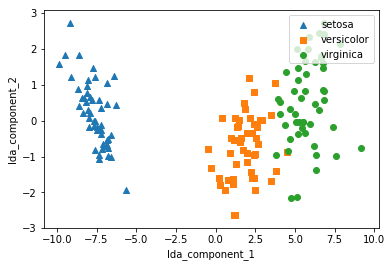

In [9]:
markers = ['^','s','o']

for i, marker in enumerate(markers) :
    x_axis_data = iris_lda_df[iris_lda_df['target'] == i]['lda_component_1']
    y_axis_data = iris_lda_df[iris_lda_df['target'] == i]['lda_component_2']
    
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend(loc = 'upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')

plt.show()